In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/MyDrive/Project-X-Lip-Reading


In [ ]:
import pickle
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, MaxPooling3D
from tensorflow.keras.layers import Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/train/X_train.pkl', 'rb') as f:
   X_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/train/y_train.pkl', 'rb') as f:
   y_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/test/X_test.pkl', 'rb') as f:
   X_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/test/y_test.pkl', 'rb') as f:
   y_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/val/X_val.pkl', 'rb') as f:
   X_val = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/val/y_val.pkl', 'rb') as f:
   y_val = pickle.load(f)

In [ ]:
def build_3d_cnn_model(input, num_classes = 10, learning_rate = 0.01, dropout_rate = 0.5):

    model = Sequential()

    # 1st Layer group
    model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=input, activation='relu', padding='valid'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

    # 2nd Layer group
    model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

    # 2nd Layer group
    model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

    # Reshape
    model.add(Reshape((128, 1*10*10)))

    # LSTMS Layer
    model.add(LSTM(32, return_sequences=True))
    model.add(Dropout(dropout_rate))

    # Flatten Layer
    model.add((Flatten()))

    # Dense & Dropout Layers
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(dropout_rate))

    # Softmax Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Model Compilation
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Tuning Hyperparameters
input = (22, 100, 100, 1)
num_classes = 10
learning_rate = 0.001
dropout_rate = 0.5

In [ ]:
# Build Model
model = build_3d_cnn_model(input, num_classes, learning_rate, dropout_rate)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 20, 98, 98, 32)      │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 10, 49, 49, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 8, 47, 47, 64)       │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 4, 23, 23, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 2, 21, 21, 128)      │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 1, 10, 10, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 128, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128, 32)             │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       8,390,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,793,674 (41.17 MB)

 Trainable params: 10,793,674 (41.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=4)

# Model Training
import time
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size = 32, callbacks = [early_stop])
t2 = time.time()
print(f"Training time : {t2 - t1} sec")

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 610ms/step - accuracy: 0.2455 - loss: 1.9917 - val_accuracy: 0.2857 - val_loss: 1.4616
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.3571 - loss: 1.4747 - val_accuracy: 0.3571 - val_loss: 1.2855
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.4110 - loss: 1.2465 - val_accuracy: 0.3571 - val_loss: 1.1116
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.3485 - loss: 1.2421 - val_accuracy: 0.3571 - val_loss: 1.1406
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.3845 - loss: 1.1695 - val_accuracy: 0.3571 - val_loss: 1.1231
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.3770 - loss: 1.1386 - val_accuracy: 0.3571 - val_loss: 1.1476
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.2982 - loss: 1.1894 - val_accuracy: 0.3571 - val_loss: 1.0808
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 0.3547 - loss: 1.1306 - val_accuracy: 0.4286 - 

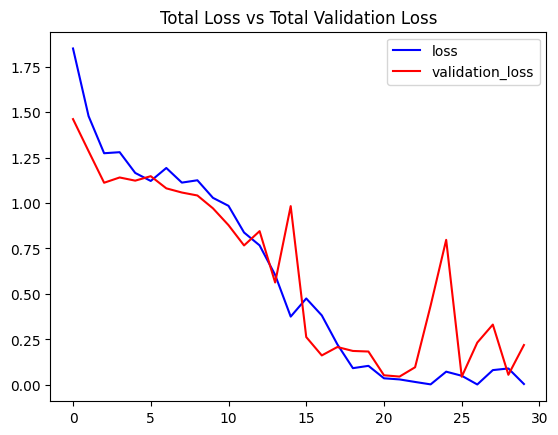

In [ ]:
# Visualizing the training and validation loss
plt.plot(history.history['loss'], 'blue', label = 'loss')
plt.plot(history.history['val_loss'], 'red', label = 'validation_loss')
plt.title("Total Loss vs Total Validation Loss")
plt.legend()
plt.show()

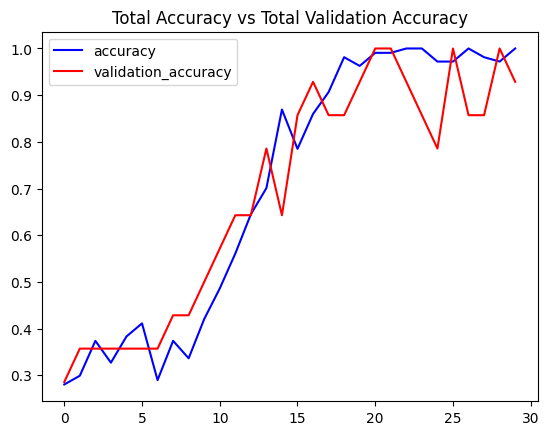

In [ ]:
# Visualizing the training and validation accuracy
plt.plot(history.history['accuracy'], 'blue', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'red', label = 'validation_accuracy')
plt.title("Total Accuracy vs Total Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
# Model Evaluation
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.9231 - loss: 0.4638
Accuracy: 92.31%


In [ ]:
# Saving Model
model.save('/content/drive/MyDrive/Project-X-Lip-Reading/Model Architecture/Saved Model/3D_CNN_LSTM.keras')